# THE SPARKS FOUNDATION  
### GRIP JULY 21(Data science and Business analytics)
### Task 6 - Prediction using Decision Tree Algorithm
### AUTHOR - ABHINAYA ANBARASAN

**OBJECTIVE**:

**Create the Decision Tree classifier and visualize it graphically.**

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix as pcm
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

### URL to get dataset: https://bit.ly/3kXTdox

### Reading data

In [2]:
df = pd.read_csv('Iris.csv')

### Exploring Data

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- **We can infer that there are null columns**

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 6)

- **There are totally 6 columns and 150 records**

In [8]:
df = df.drop('Id',axis =1 )
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- **We will drop the 'Id' column since it will not add any significance to our model**

In [9]:
df.Species.value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

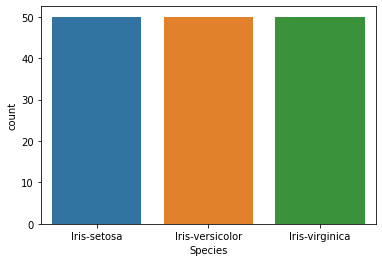

In [10]:
sns.countplot(df.Species);

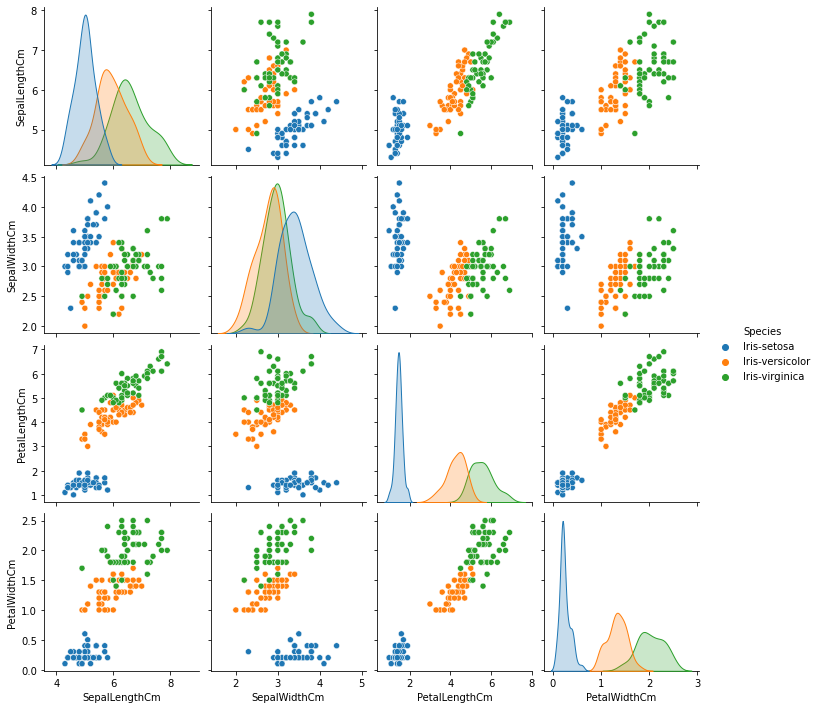

In [11]:
sns.pairplot(df, hue = 'Species');

### Checking for skewness 

In [12]:
df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

- **All the columns follow near normal  distribution**

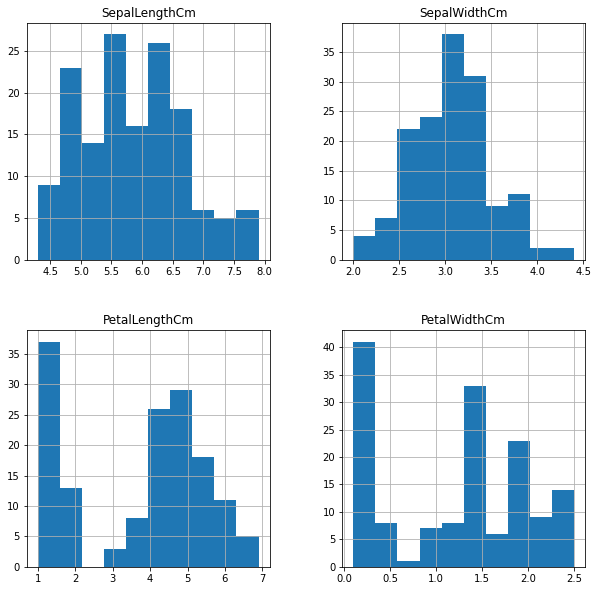

In [13]:
df.hist(figsize= (10,10));

### Correlation Check 

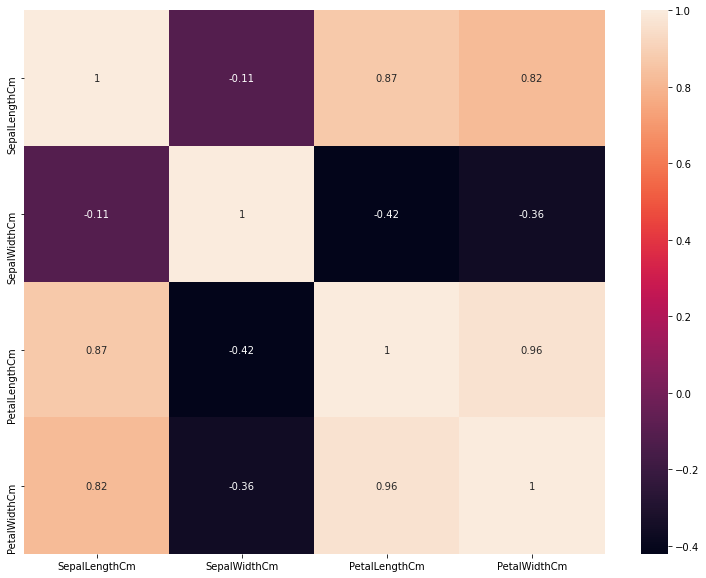

In [14]:
plt.figure(figsize= (13,10))
sns.heatmap(df.corr(),annot = True);

- **PetalWidthCm and SepalLengthCm have strong positive correlation**
- **PetalLengthCm and SepalLengthCm have strong positive correlation**
- **PetalLengthCm and PetalWidthCm have strong positive correlation**

### Encoding 

In [15]:
df['Species'] = df['Species'].map({'Iris-virginica':0,'Iris-versicolor': 1,'Iris-setosa':2})

In [16]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

### Train- test Split

In [17]:
x = df.drop('Species', axis = 1)
y = df.Species
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state= 51)

In [18]:
x_train.shape

(105, 4)

In [19]:
x_test.shape

(45, 4)

In [20]:
y_train.shape

(105,)

In [21]:
y_test.shape

(45,)

### Model Building

In [22]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred_train = model.predict(x_train)
y_pred_train

array([2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1], dtype=int64)

In [56]:
y_pred_test = model.predict(x_test)
y_pred_test

array([1, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       2, 2, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       0], dtype=int64)

### Accuracy and Confusion Matrix 

In [57]:
print('Accuracy for train : ',round(accuracy_score(y_train,y_pred_train)*100,2),"%")

Accuracy for train :  100.0 %


In [58]:
print('Accuracy for test : ',round(accuracy_score(y_test,y_pred_test)*100,2),"%")

Accuracy for test :  95.56 %


- **Our model is overfitting**

In [53]:
cm = confusion_matrix(y_test,y_pred_test)
cm

array([[16,  1,  0],
       [ 1, 16,  0],
       [ 0,  0, 11]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.94      0.94      0.94        17
           2       1.00      1.00      1.00        11

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



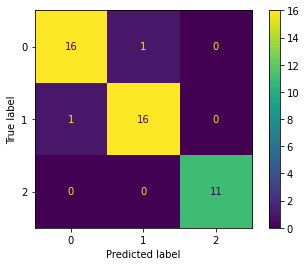

In [27]:
pcm(estimator= model, X = x_test,y_true= y_test);

### Visualizing the Tree

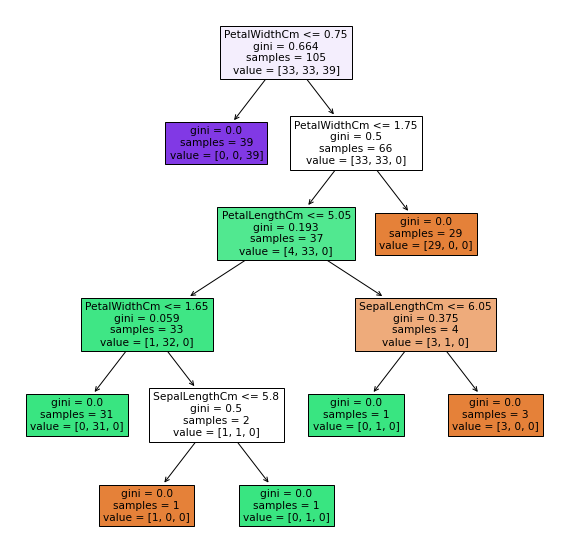

In [28]:
plt.figure(figsize  = (10,10))
tree.plot_tree(model,filled = True,feature_names= x.columns)
plt.show()

### HYPERPARAMETER TUNING

In [59]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

In [60]:
Dtree = DecisionTreeClassifier()
grid = GridSearchCV(estimator = Dtree, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

In [61]:
grid_model = grid.fit(x_train,y_train)

In [62]:
grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'max_leaf_nodes': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [64]:
tuned_model = DecisionTreeClassifier(criterion= 'entropy',
                                     max_depth= 4,max_features= 'log2',
                                     max_leaf_nodes= 4,min_samples_leaf= 2,min_samples_split= 5)
tuned_model = tuned_model.fit(x_train,y_train)

In [65]:
ypred_tune_train = tuned_model.predict(x_train)
ypred_tune_train

array([2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2,
       2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2,
       0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1], dtype=int64)

In [66]:
print('Accuracy for train post tuning:',round(accuracy_score(y_train,ypred_tune_train),2),"%")

Accuracy for train post tuning: 0.81 %


In [67]:
ypred_tune_test = tuned_model.predict(x_test)
ypred_tune_test

array([1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0,
       2, 2, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0], dtype=int64)

In [68]:
print('Accuracy for test post tuning:',round(accuracy_score(y_test,ypred_tune_test),2),"%")

Accuracy for test post tuning: 0.73 %


**Since there is no significant difference between the train and test accuracy after tuning ,** 
**we can conclude that in our case tuning hyperparameters helped us to avoid overfitting of the data**